<a href="https://colab.research.google.com/github/niwatoro/simple-trading-strategy-with-excel/blob/main/Simple_Trading_Strategy_MA_crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


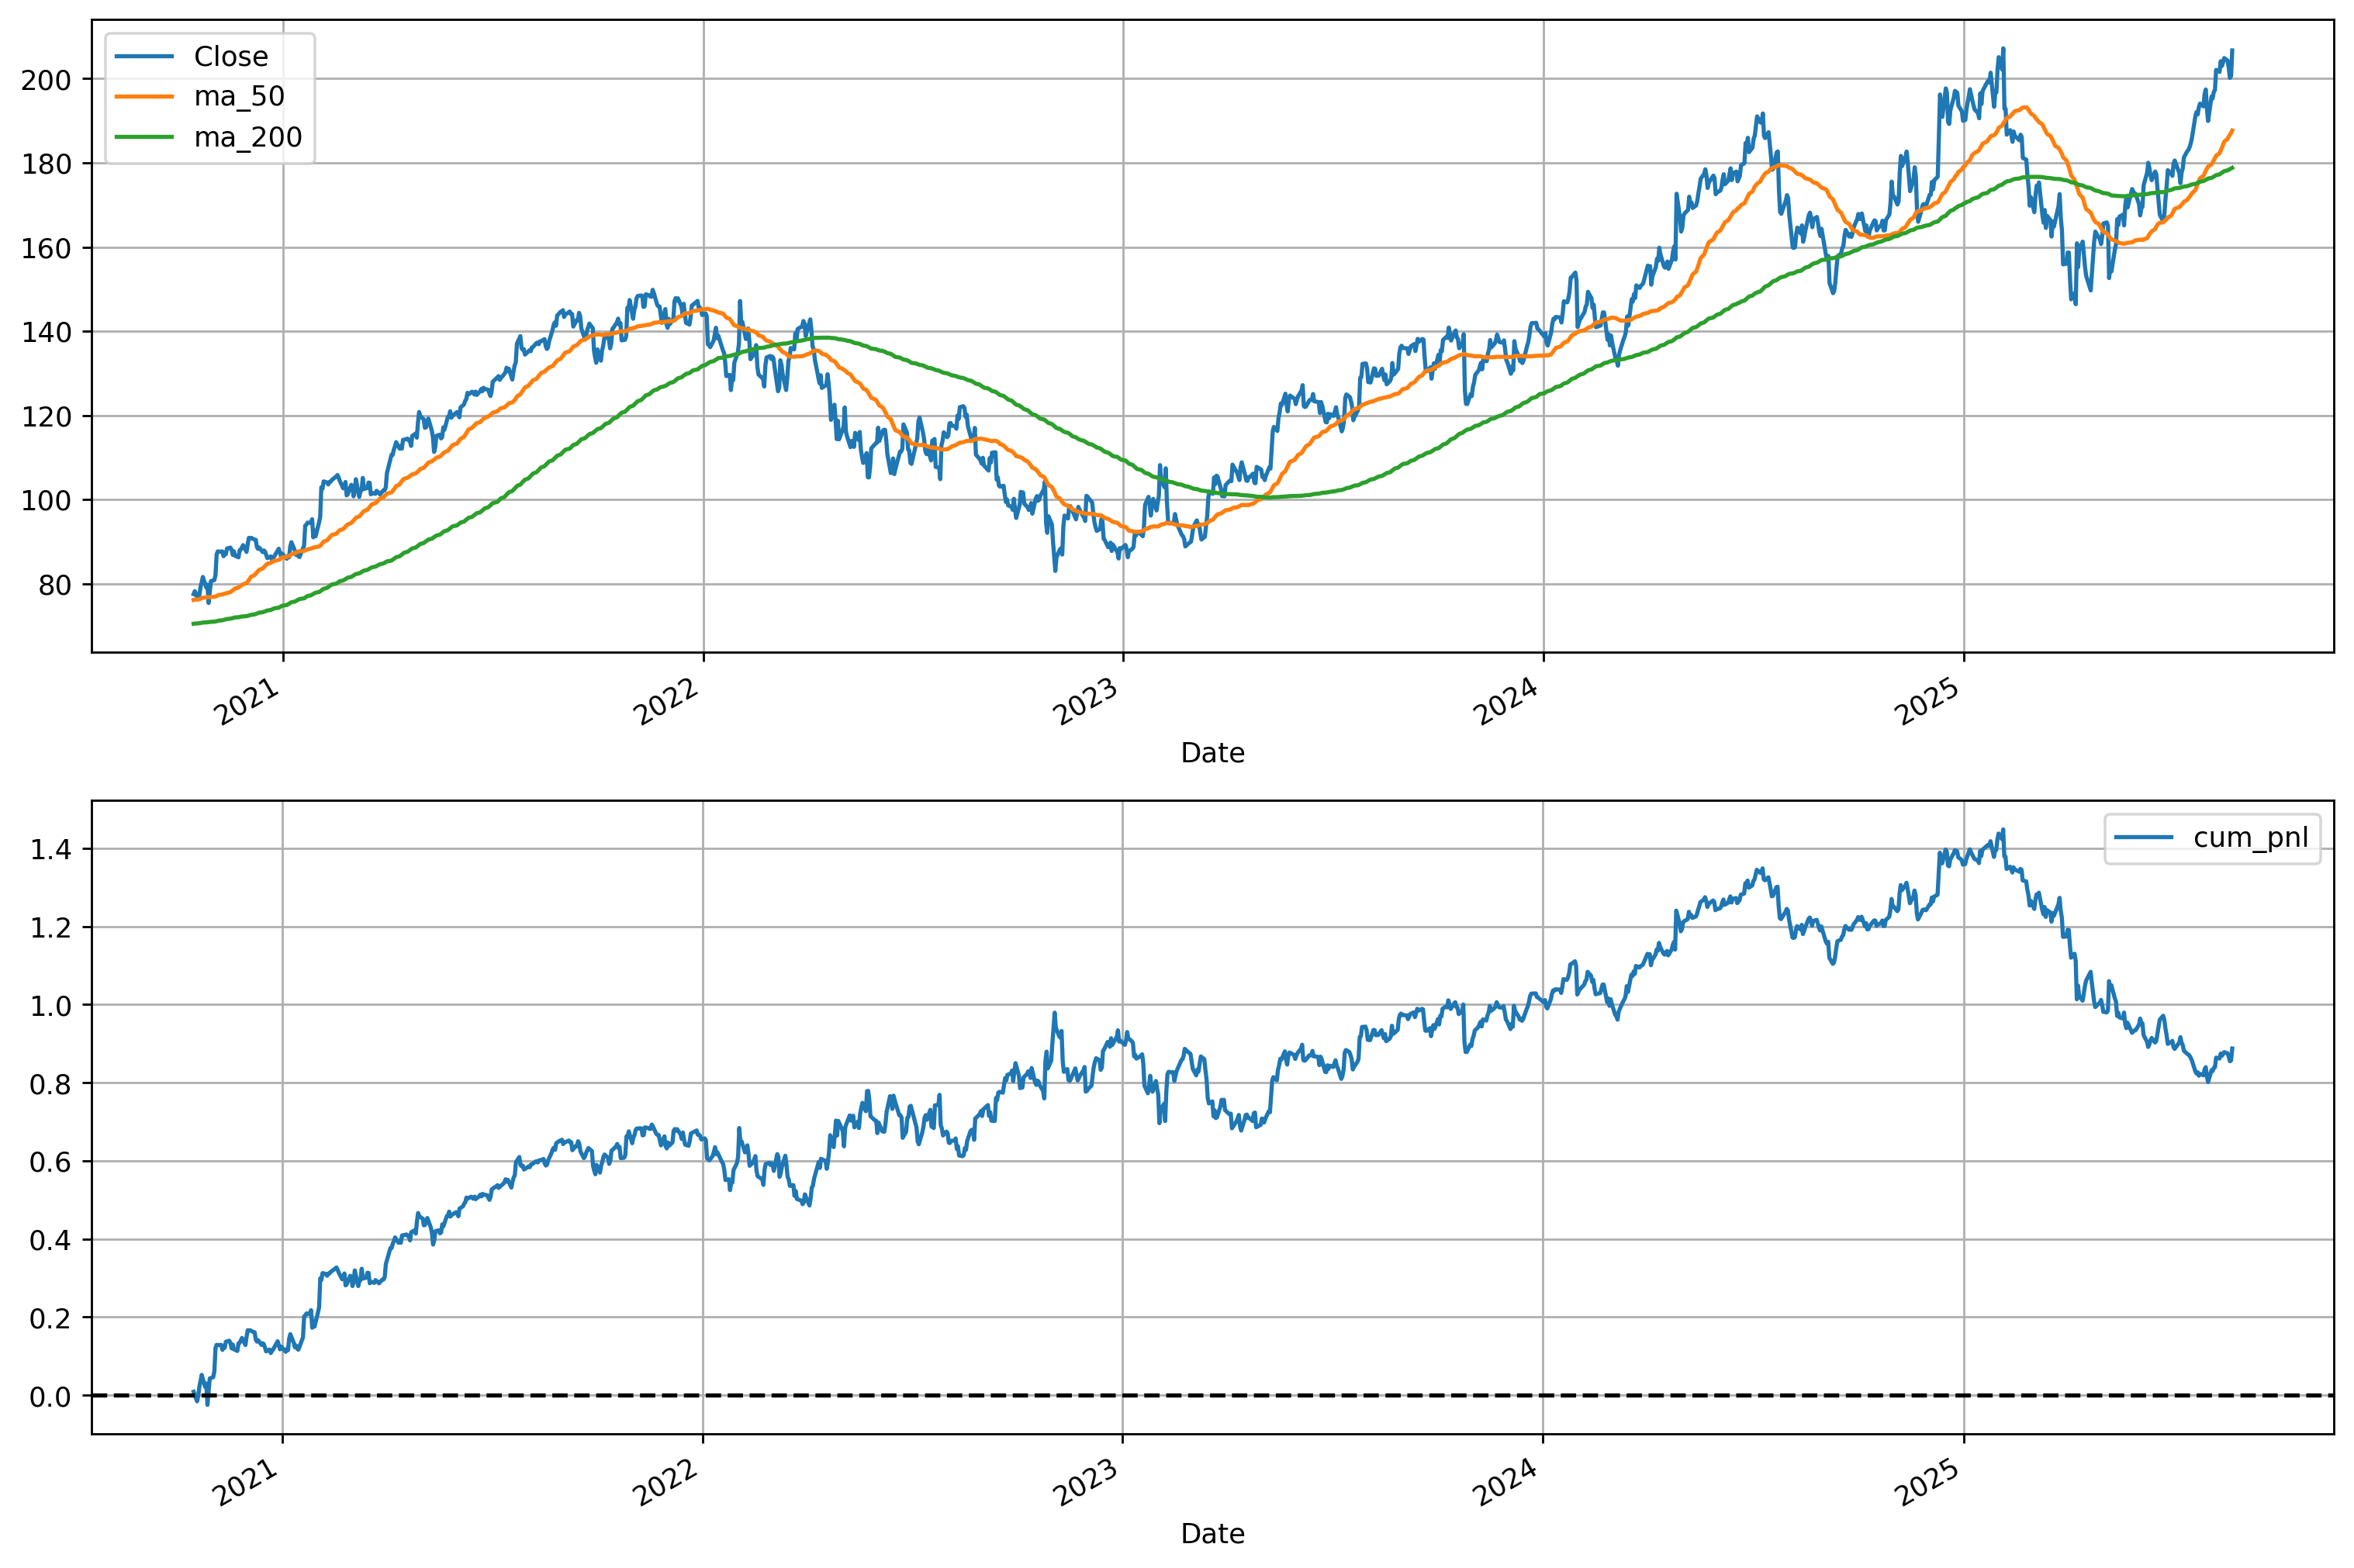

In [10]:
ticker = "GOOG"
data = yf.download(ticker, start="2020-01-01", auto_adjust=True)
data["ma_50"] = data["Close"].rolling(50).mean()
data["ma_200"] = data["Close"].rolling(200).mean()
data.dropna(inplace=True)
data.columns = [col[0] for col in data.columns]
data["position"] = np.where(data["ma_50"] > data["ma_200"], 1, -1)
data["returns"] = data["Close"].pct_change()
data["pnl"] = data["returns"] * data["position"].shift(1)
data["cum_pnl"] = data["pnl"].cumsum()

fig, axes = plt.subplots(2, 1, figsize=(12, 8), dpi=256)
data[["Close", "ma_50", "ma_200"]].plot(ax=axes[0], grid=True)
data[["cum_pnl"]].plot(ax=axes[1], grid=True)
axes[1].axhline(0, color="black", linestyle="--")
plt.tight_layout()

In [11]:
data

,Close,High,Low,Open,Volume,ma_50,ma_200,position,returns,pnl,cum_pnl
Date,,,,,,,,,,,
2020-10-15,77.495857,78.289889,76.795029,76.900398,30800000,76.106501,70.437634,1,NaN,NaN,NaN
2020-10-16,78.185753,78.589360,77.688214,77.829874,28694000,76.178981,70.488740,1,0.008902,0.008902,0.008902
2020-10-19,76.277092,78.938275,75.948547,78.556049,32142000,76.218863,70.531971,1,-0.024412,-0.024412,-0.015510
2020-10-20,77.336800,78.408926,75.832739,75.901332,44834000,76.278340,70.572162,1,0.013893,0.013893,-0.001617
2020-10-21,79.194748,80.458241,78.117154,78.201651,51366000,76.390662,70.621859,1,0.024024,0.024024,0.022407
...,...,...,...,...,...,...,...,...,...,...,...
2025-08-18,204.289993,206.139999,203.410004,205.070007,13000200,185.709600,178.217441,1,-0.003026,-0.003026,0.875159
2025-08-19,202.490005,204.289993,200.929993,203.904999,13476600,186.265200,178.377158,1,-0.008811,-0.008811,0.866349
2025-08-20,200.190002,202.169998,197.460007,201.679993,13971700,186.716400,178.500462,1,-0.011359,-0.011359,0.854990


In [ ]:
yf.download(ticker, start="2020-01-01", auto_adjust=True).to_excel(f"{ticker}.xlsx")

[*********************100%***********************]  1 of 1 completed
